In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import optuna
from google.colab import drive

In [ ]:
happy_teddy_combine_path = r'/content/merge_happy_and_teddy.csv'


happy_teddy_combine_df = pd.read_csv(happy_teddy_combine_path)

## EDA PLOTS FOR COMBINE DATASET

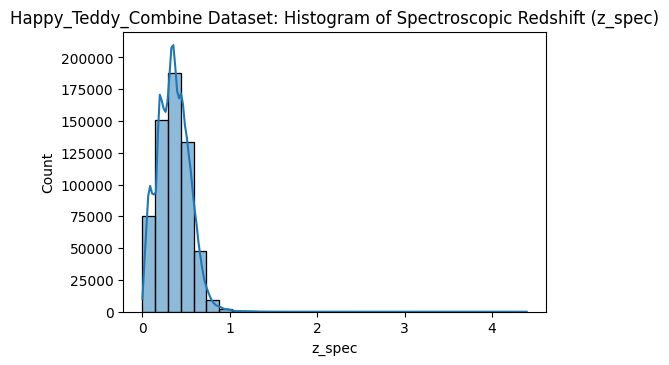

<Figure size 800x600 with 0 Axes>

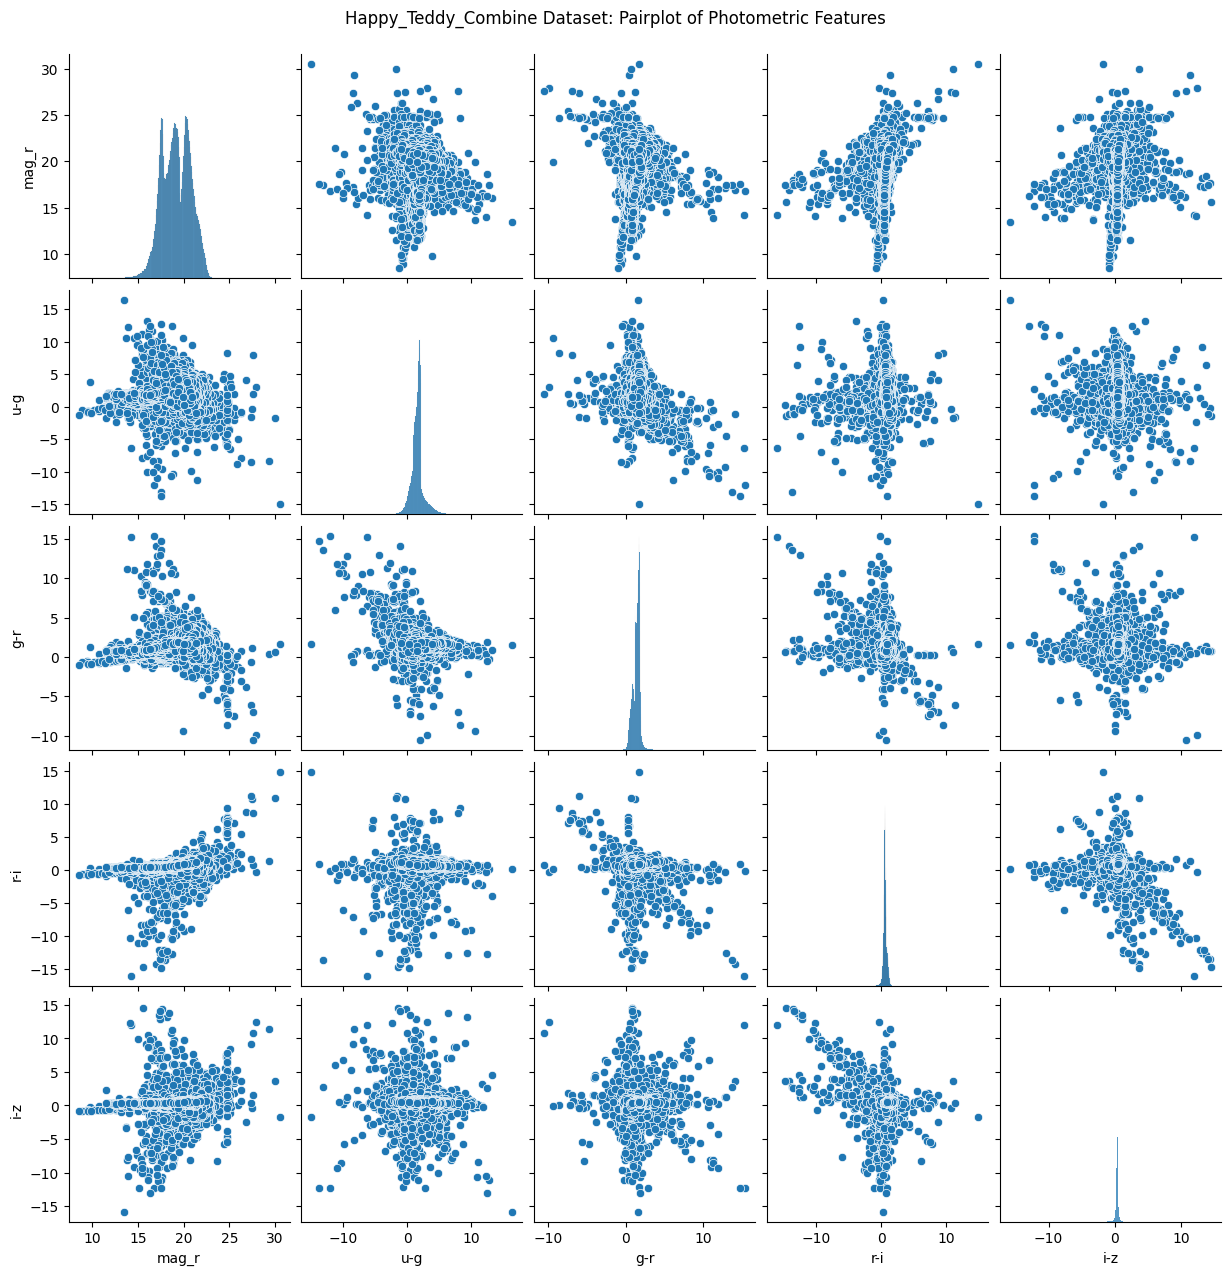

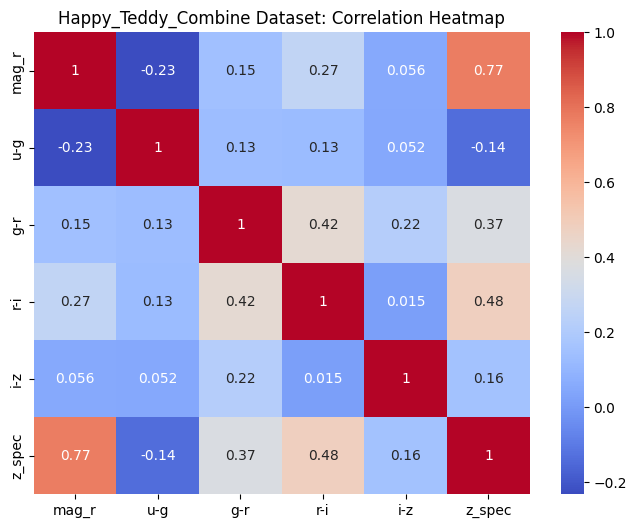

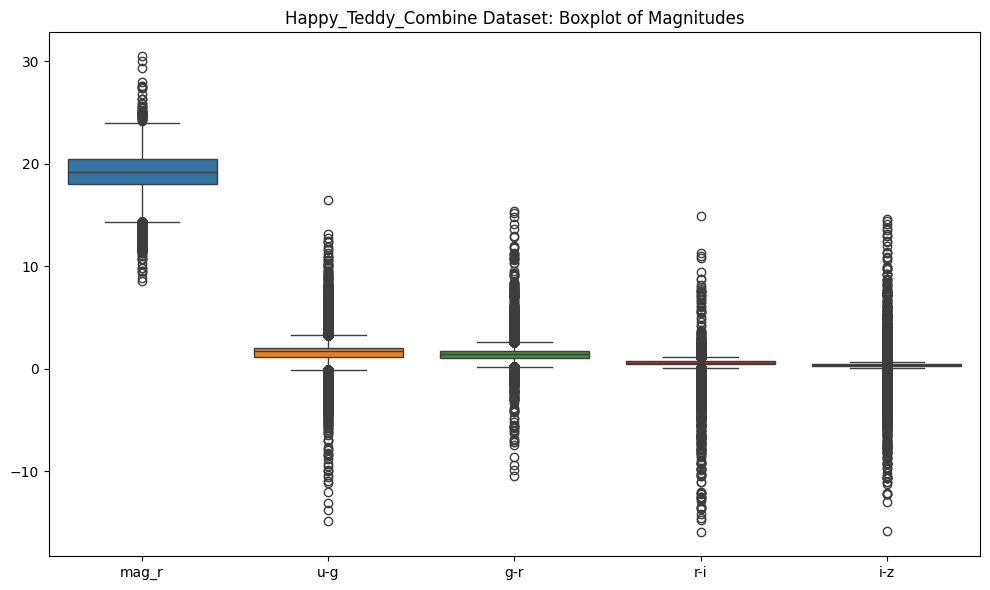

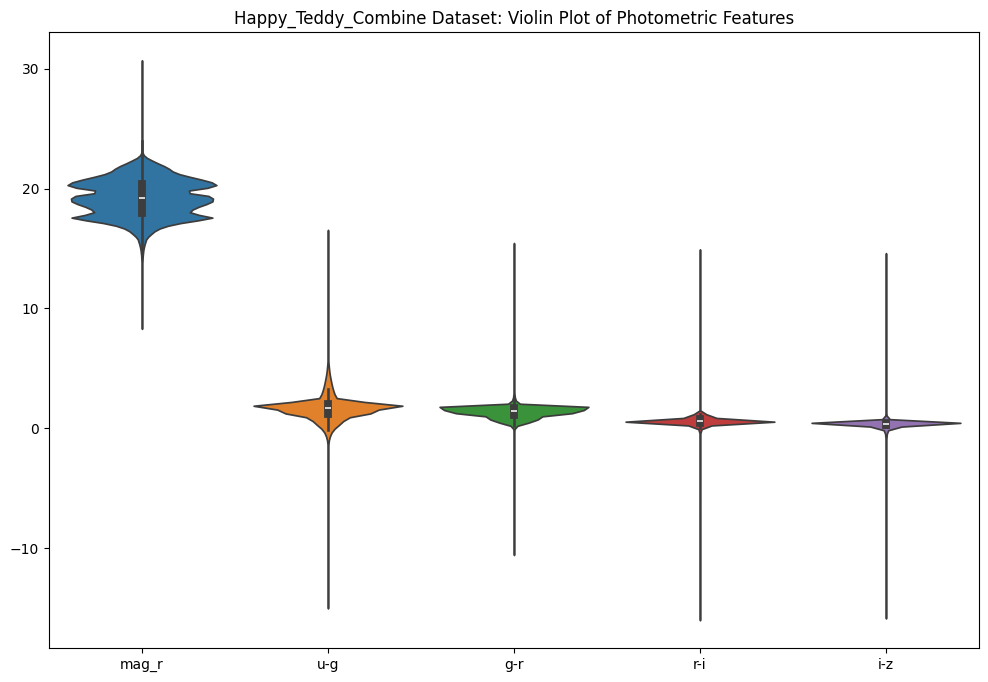

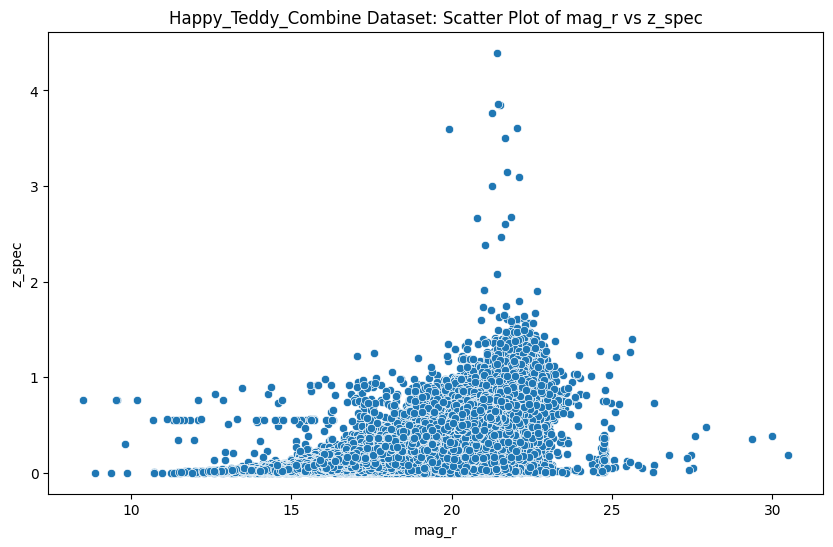

In [ ]:
def create_eda_plots(df, dataset_name):
    plt.figure(figsize=(12, 8))

    # Histogram of spectroscopic redshift (z_spec)
    plt.subplot(2, 2, 1)
    sns.histplot(df['z_spec'], bins=30, kde=True)
    plt.title(f'{dataset_name}: Histogram of Spectroscopic Redshift (z_spec)')

    # Pairplot of photometric features
    plt.figure(figsize=(8, 6))
    sns.pairplot(df[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
    plt.suptitle(f'{dataset_name}: Pairplot of Photometric Features', y=1.02)

    # Correlation heatmap
    plt.figure(figsize=(8, 6))
    corr_matrix = df[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z', 'z_spec']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(f'{dataset_name}: Correlation Heatmap')

    # Boxplot of magnitudes
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
    plt.title(f'{dataset_name}: Boxplot of Magnitudes')

    plt.tight_layout()
    plt.show()

     # Violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=df[['mag_r', 'u-g', 'g-r', 'r-i', 'i-z']])
    plt.title(f'{dataset_name}: Violin Plot of Photometric Features')
    plt.show()

    # Count plot of 'u-g'
   # plt.figure(figsize=(10, 6))
    #sns.countplot(x='u-g', data=df)
    #plt.title(f'{dataset_name}: Count Plot of u-g')
    #plt.show()

    # Scatter plot of 'mag_r' vs 'z_spec'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='mag_r', y='z_spec', data=df)
    plt.title(f'{dataset_name}: Scatter Plot of mag_r vs z_spec')
    plt.show()

create_eda_plots(happy_teddy_combine_df, 'Happy_Teddy_Combine Dataset')


In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/merge_happy_and_teddy.csv')

In [ ]:
# Define feature columns and target column (using normalized features)
features = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5']
target = 'z_spec'


In [ ]:
# Handle missing values
df = df.dropna(subset=features + [target])


In [ ]:
X = df[features]
y = df[target]



In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the objective function for Optuna
def objective(trial):
    model_type = trial.suggest_categorical('model_type', ['RandomForest', 'GradientBoosting'])
    if model_type == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 10, 50)
        model = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )
    else:
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 10, 50)
        model = GradientBoostingRegressor(
            learning_rate=learning_rate,
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42
        )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

In [ ]:
# Create a study and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

[I 2024-08-18 08:04:23,457] A new study created in memory with name: no-name-70ed05b9-5d28-4f33-845a-6ce724a5ea03
<ipython-input-10-d6b3b85edc73>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
[I 2024-08-18 08:27:42,317] Trial 0 finished with value: 0.005496232597335089 and parameters: {'model_type': 'GradientBoosting', 'learning_rate': 0.039160980931035407, 'n_estimators': 151, 'max_depth': 16}. Best is trial 0 with value: 0.005496232597335089.
[I 2024-08-18 08:58:22,724] Trial 1 finished with value: 0.005174664885003358 and parameters: {'model_type': 'RandomForest', 'n_estimators': 241, 'max_depth': 38}. Best is trial 1 with value: 0.005174664885003358.
<ipython-input-10-d6b3b85edc73>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Th

In [ ]:
# Get the best hyperparameters
best_params = {'model_type': 'RandomForest', 'n_estimators': 219, 'max_depth': 28}
print(f'Best hyperparameters: {best_params}')


Best hyperparameters: {'model_type': 'RandomForest', 'n_estimators': 219, 'max_depth': 28}


In [ ]:
# Train and evaluate the best model
if best_params['model_type'] == 'RandomForest':
    best_model = RandomForestRegressor(
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        random_state=42
    )
else:
    best_model = GradientBoostingRegressor(
        learning_rate=best_params['learning_rate'],
        n_estimators=best_params['n_estimators'],
        max_depth=best_params['max_depth'],
        random_state=42
    )
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = best_model.score(X_train, y_train)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = best_model.score(X_test, y_test)

print(f'Training MSE: {mse_train}')
print(f'Training RMSE: {rmse_train}')
print(f'Training R²: {r2_train}')
print(f'Test MSE: {mse_test}')
print(f'Test RMSE: {rmse_test}')
print(f'Test R²: {r2_test}')

Training MSE: 0.0009479221719381455
Training RMSE: 0.030788344741771122
Training R²: 0.9699385110883783
Test MSE: 0.005198948979162707
Test RMSE: 0.07210373762269684
Test R²: 0.8335498158354886


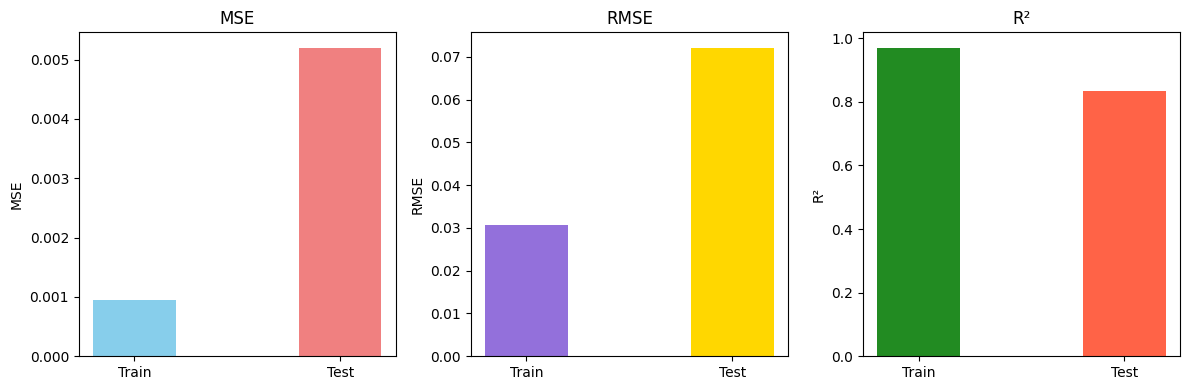

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# New performance metrics for combined dataset
training_scores_combined = [mse_train, rmse_train, r2_train]
test_scores_combined = [mse_test, rmse_test, r2_test]

# Set the figure size
plt.figure(figsize=(12, 4))

# Plotting MSE
plt.subplot(1, 3, 1)
bar_width = 0.4
index = np.arange(2)
plt.bar(index, [training_scores_combined[0], test_scores_combined[0]], bar_width, color=['skyblue', 'lightcoral'])
plt.xticks(index, ['Train', 'Test'])
plt.title('MSE')
plt.ylabel('MSE')

# Plotting RMSE
plt.subplot(1, 3, 2)
plt.bar(index, [training_scores_combined[1], test_scores_combined[1]], bar_width, color=['mediumpurple', 'gold'])
plt.xticks(index, ['Train', 'Test'])
plt.title('RMSE')
plt.ylabel('RMSE')

# Plotting R²
plt.subplot(1, 3, 3)
plt.bar(index, [training_scores_combined[2], test_scores_combined[2]], bar_width, color=['forestgreen', 'tomato'])
plt.xticks(index, ['Train', 'Test'])
plt.title('R²')
plt.ylabel('R²')

plt.tight_layout()
plt.show()


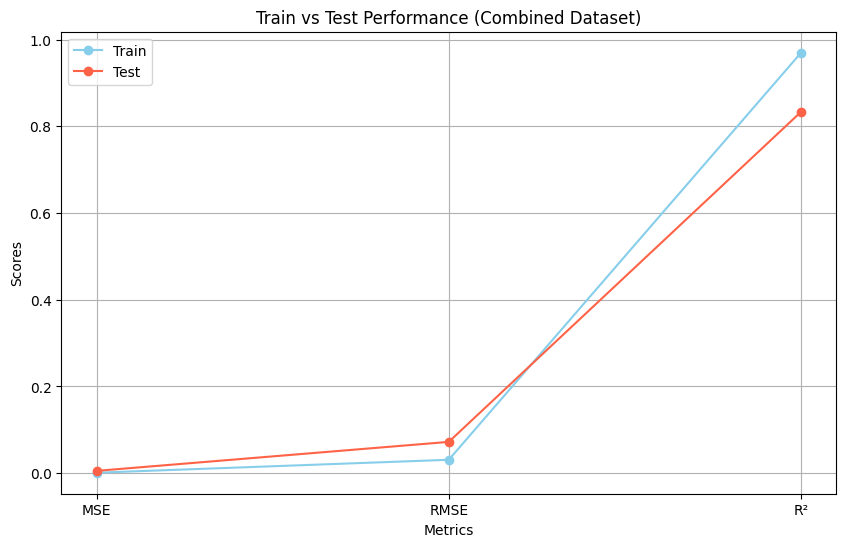

In [ ]:
# Data for plotting
metrics = ['MSE', 'RMSE', 'R²']
train_scores_combined = [mse_train, rmse_train, r2_train]
test_scores_combined = [mse_test, rmse_test, r2_test]

plt.figure(figsize=(10, 6))

plt.plot(metrics, train_scores_combined, marker='o', label='Train', color='skyblue')
plt.plot(metrics, test_scores_combined, marker='o', label='Test', color='tomato')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Train vs Test Performance (Combined Dataset)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Generate predictions
y_pred = best_model.predict(X_test)

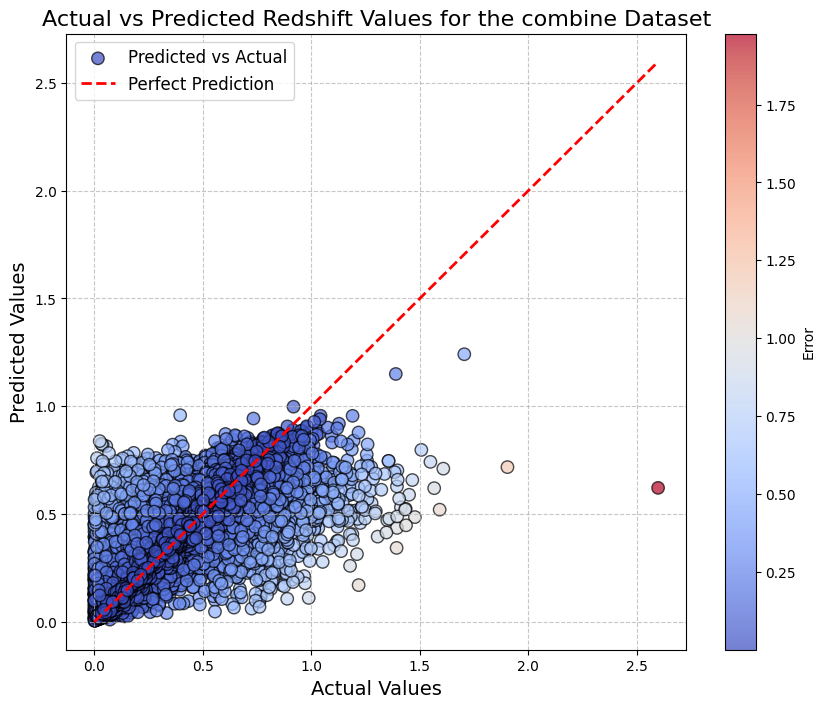

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate error
errors = np.abs(y_test - y_pred)

# Create a scatter plot with a color gradient based on the error
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', alpha=0.7, edgecolor='k', s=80, label='Predicted vs Actual')

# Add a line for the perfect prediction
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, linestyle='--', label='Perfect Prediction')

# Customize the plot
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('Actual vs Predicted Redshift Values for the combine Dataset', fontsize=16)
plt.legend(fontsize=12)
plt.colorbar(label='Error')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


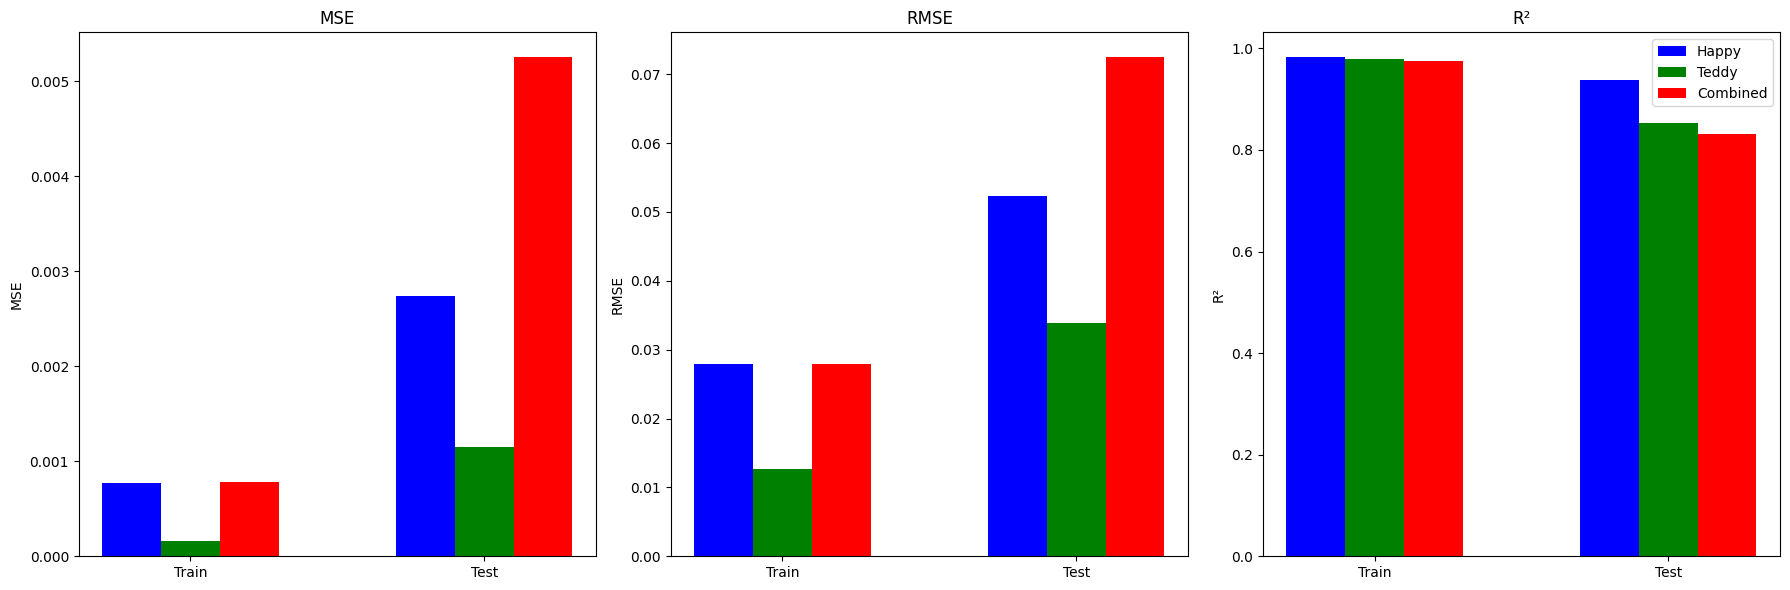

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Performance metrics for Happy, Teddy, and Combined datasets
happy_metrics = [0.000775762792258263, 0.027852518598113583, 0.9825206153082429, 0.002737901262988879, 0.052324958318080664, 0.9375904122603527]
teddy_metrics = [0.00016152529975510898, 0.012709260393709343, 0.9795724273059899, 0.001145687405706767, 0.03384800445678839, 0.8533350412217106]
combined_metrics = [0.0007820074568386909, 0.027964396235904878, 0.9752001702370817, 0.005251404062778026, 0.07246657203689179, 0.8318704074852377]

# Set the figure size
plt.figure(figsize=(18, 6))

# Plotting MSE
plt.subplot(1, 3, 1)
bar_width = 0.2
index = np.arange(2)
plt.bar(index, [happy_metrics[0], happy_metrics[3]], bar_width, label='Happy', color='blue')
plt.bar(index + bar_width, [teddy_metrics[0], teddy_metrics[3]], bar_width, label='Teddy', color='green')
plt.bar(index + 2 * bar_width, [combined_metrics[0], combined_metrics[3]], bar_width, label='Combined', color='red')
plt.xticks(index + bar_width, ['Train', 'Test'])
plt.title('MSE')
plt.ylabel('MSE')

# Plotting RMSE
plt.subplot(1, 3, 2)
plt.bar(index, [happy_metrics[1], happy_metrics[4]], bar_width, label='Happy', color='blue')
plt.bar(index + bar_width, [teddy_metrics[1], teddy_metrics[4]], bar_width, label='Teddy', color='green')
plt.bar(index + 2 * bar_width, [combined_metrics[1], combined_metrics[4]], bar_width, label='Combined', color='red')
plt.xticks(index + bar_width, ['Train', 'Test'])
plt.title('RMSE')
plt.ylabel('RMSE')

# Plotting R²
plt.subplot(1, 3, 3)
plt.bar(index, [happy_metrics[2], happy_metrics[5]], bar_width, label='Happy', color='blue')
plt.bar(index + bar_width, [teddy_metrics[2], teddy_metrics[5]], bar_width, label='Teddy', color='green')
plt.bar(index + 2 * bar_width, [combined_metrics[2], combined_metrics[5]], bar_width, label='Combined', color='red')
plt.xticks(index + bar_width, ['Train', 'Test'])
plt.title('R²')
plt.ylabel('R²')

plt.legend()
plt.tight_layout()
plt.show()


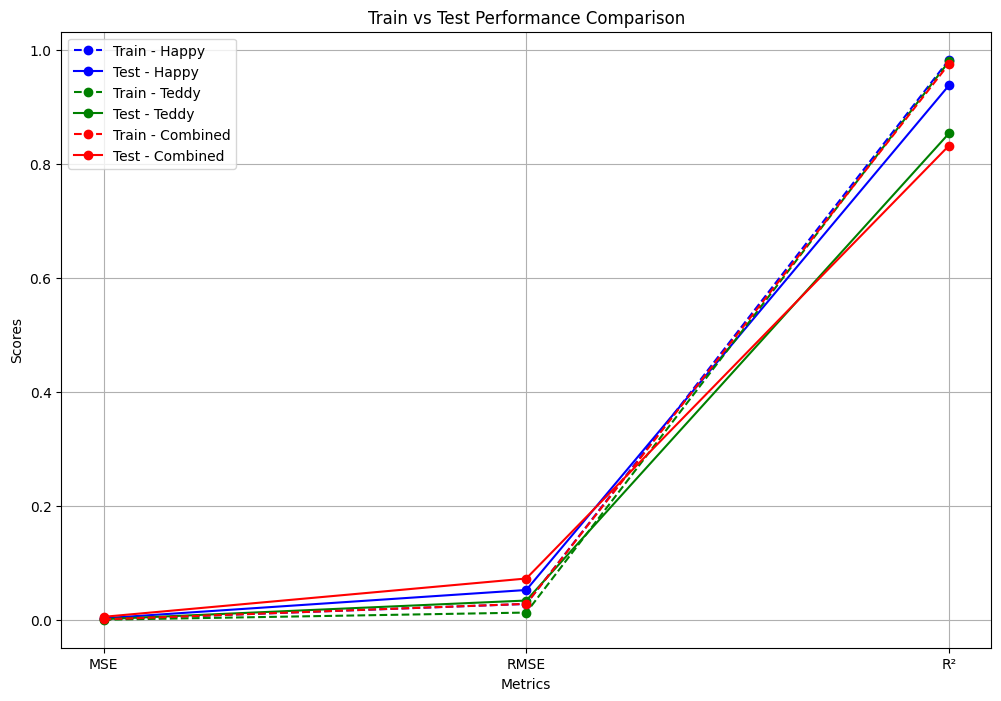

In [ ]:
# Data for plotting
metrics = ['MSE', 'RMSE', 'R²']
train_scores_happy = [0.000775762792258263, 0.027852518598113583, 0.9825206153082429]
test_scores_happy = [0.002737901262988879, 0.052324958318080664, 0.9375904122603527]
train_scores_teddy = [0.00016152529975510898, 0.012709260393709343, 0.9795724273059899]
test_scores_teddy = [0.001145687405706767, 0.03384800445678839, 0.8533350412217106]
train_scores_combined = [0.0007820074568386909, 0.027964396235904878, 0.9752001702370817]
test_scores_combined = [0.005251404062778026, 0.07246657203689179, 0.8318704074852377]

plt.figure(figsize=(12, 8))

# Plot Happy dataset
plt.plot(metrics, train_scores_happy, marker='o', label='Train - Happy', color='blue', linestyle='dashed')
plt.plot(metrics, test_scores_happy, marker='o', label='Test - Happy', color='blue')

# Plot Teddy dataset
plt.plot(metrics, train_scores_teddy, marker='o', label='Train - Teddy', color='green', linestyle='dashed')
plt.plot(metrics, test_scores_teddy, marker='o', label='Test - Teddy', color='green')

# Plot Combined dataset
plt.plot(metrics, train_scores_combined, marker='o', label='Train - Combined', color='red', linestyle='dashed')
plt.plot(metrics, test_scores_combined, marker='o', label='Test - Combined', color='red')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Train vs Test Performance Comparison')
plt.legend()
plt.grid(True)
plt.show()
